In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, display_html
from tqdm import tqdm

In [3]:
import sys
sys.path.append("..")
from rllib.student import student
from rllib.dp import dp
from rllib.linear_solver import linear_solver
from rllib import misc

# define MDP

In [4]:
o = student()

# Solve q*(s,a)

In [6]:
hist = []
result_max = None
for i in tqdm(range(50_000)):
    a0, a1, a2, a3 = np.random.random(4)
    o.Π[0,o.A.index('study')] = a0
    o.Π[0,o.A.index('facebook')] = 1 - a0
    o.Π[1,o.A.index('study')] = a1
    o.Π[1,o.A.index('sleep')] = 1 - a1
    o.Π[2,o.A.index('pub')] = a2
    o.Π[2,o.A.index('study')] = 1 - a2
    o.Π[3,o.A.index('facebook')] = a3
    o.Π[3,o.A.index('quit')] = 1 - a3
    # run
    tmp_res = linear_solver.q_linear_solver(o, 1-0.1**10)
    if result_max is None:
        result_max = tmp_res
    else:
        result_max = np.maximum(result_max, np.array(tmp_res))
        tmp_hist = []
        for i in range(result_max.shape[0]):
            for j in range(result_max.shape[1]):
                if o.Π[i,j] != 0:
                    tmp_hist.append(result_max[i,j])
        hist.append(tmp_hist)

100%|████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:04<00:00, 10510.06it/s]


# Plot

In [7]:
dfx = pd.DataFrame(hist, columns=[
    'class1 facebook', 
    'class1 study', 
    
    'class2 study', 
    'class2 sleep', 
    
    'class3 study',
    'class3 pub',
    
    'fb facebook',
    'fb quit',
    
    'sleep other',
])

In [8]:
df1 = pd.DataFrame(result_max, index=['class1', 'class2', 'class3', 'fb', 'sleep'])
df1.columns = ['facebook', 'quit', 'study', 'sleep', 'pub', 'other']

In [9]:
df2 = pd.DataFrame(np.max(result_max, axis=1), index=['class1', 'class2', 'class3', 'fb', 'sleep'])

Q*(s,a) 
 
 
   
 facebook 
 quit 
 study 
 sleep 
 pub 
 other 
 
 
 
 
 class1 
 4.8 
 0.0 
 6.0 
 0.0 
 0.0 
 0.0 
 
 
 class2 
 0.0 
 0.0 
 8.0 
 0.0 
 0.0 
 0.0 
 
 
 class3 
 0.0 
 0.0 
 10.0 
 0.0 
 9.3 
 0.0 
 
 
 fb 
 4.8 
 5.9 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 sleep 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 

 
 V*(s) 
 
 
 0 
 
 
 
 
 6.0 
 
 
 8.0 
 
 
 10.0 
 
 
 5.9 
 
 
 0.0

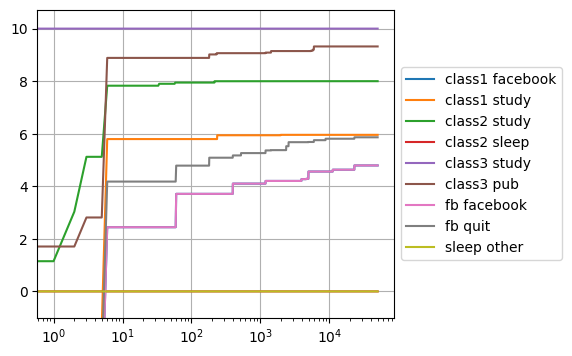

In [10]:
df1_styler = df1.style.apply(misc.color_positive_green, mask=o.Π, axis=None)\
    .format(precision=1)\
    .set_table_attributes("style='display:inline'")\
    .set_caption('Q*(s,a)')
df2_styler = df2.style.apply(misc.color_positive_green_vertical, axis=None)\
    .format(precision=1)\
    .hide(axis='index')\
    .set_table_attributes("style='display:inline'")\
    .set_caption('V*(s)')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

fig, ax = plt.subplots(1,figsize=(4.6, 4))
# dfx[:40_000].plot(grid=True, ax=ax)
dfx.plot(grid=True, ax=ax)
ax.set_xscale('log')
plt.ylim(bottom=-1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()